In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns

In [2]:
import visualizer
import dataparser

In [3]:
df = pd.read_csv("QF_S_PARSED.csv")

In [4]:
df["task-clock:u"] = df["task-clock:u"].astype(float)
df

,Unnamed: 0,problem,solver,status,sanity_sat,task-clock:u,context-switches:u,cpu-migrations:u,page-faults:u,cycles:u,...,branches:u,branch-misses:u,slots:u,topdown-retiring:u,topdown-bad-spec:u,topdown-fe-bound:u,topdown-be-bound:u,elapsed,user,sys
0,0,20240318-omark_lyndon-schuetzenberg-2,z3noodler,Success,unsat,17.23,0.0,0.0,2708.0,40915607.0,...,15905643.0,178123.0,2.045780e+08,76257219.0,18452134.0,66614678.0,43348942.0,0.018805,0.012783,0.004918
1,1,20240318-omark_noodles-unsat,cvc5,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20240318-omark_noodles-unsat-6,z3noodler,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20240318-omark_noodles-unsat-8,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20240318-omark_noodles-unsat-6,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25439,25439,queries-no-ree_query3487,z3alpha,Success,sat,114.96,0.0,0.0,6228.0,321203184.0,...,69912165.0,1425533.0,9.448009e+08,296135176.0,132112653.0,353780763.0,175039544.0,0.198612,0.090167,0.025605
25440,25440,queries-no-ree_query6796,cvc5,Success,sat,84.91,0.0,0.0,1321.0,294333431.0,...,80048246.0,2158311.0,1.467508e+09,414355122.0,287746612.0,569738293.0,195667696.0,0.085674,0.082907,0.001992
25441,25441,queries-no-ree_query3450,cvc5,Success,sat,71.74,0.0,0.0,1261.0,246927443.0,...,68116685.0,1797106.0,1.232916e+09,348117489.0,241748256.0,483496513.0,159553849.0,0.072532,0.069873,0.001995
25442,25442,queries-no-ree_query10650,z3alpha,Success,sat,90.00,0.0,0.0,6215.0,234247474.0,...,51598190.0,1132674.0,7.669649e+08,211575299.0,123340737.0,304419349.0,146037153.0,0.191354,0.075521,0.015490


In [5]:
pivot_df = df.pivot(index='problem', columns='solver', values='task-clock:u')

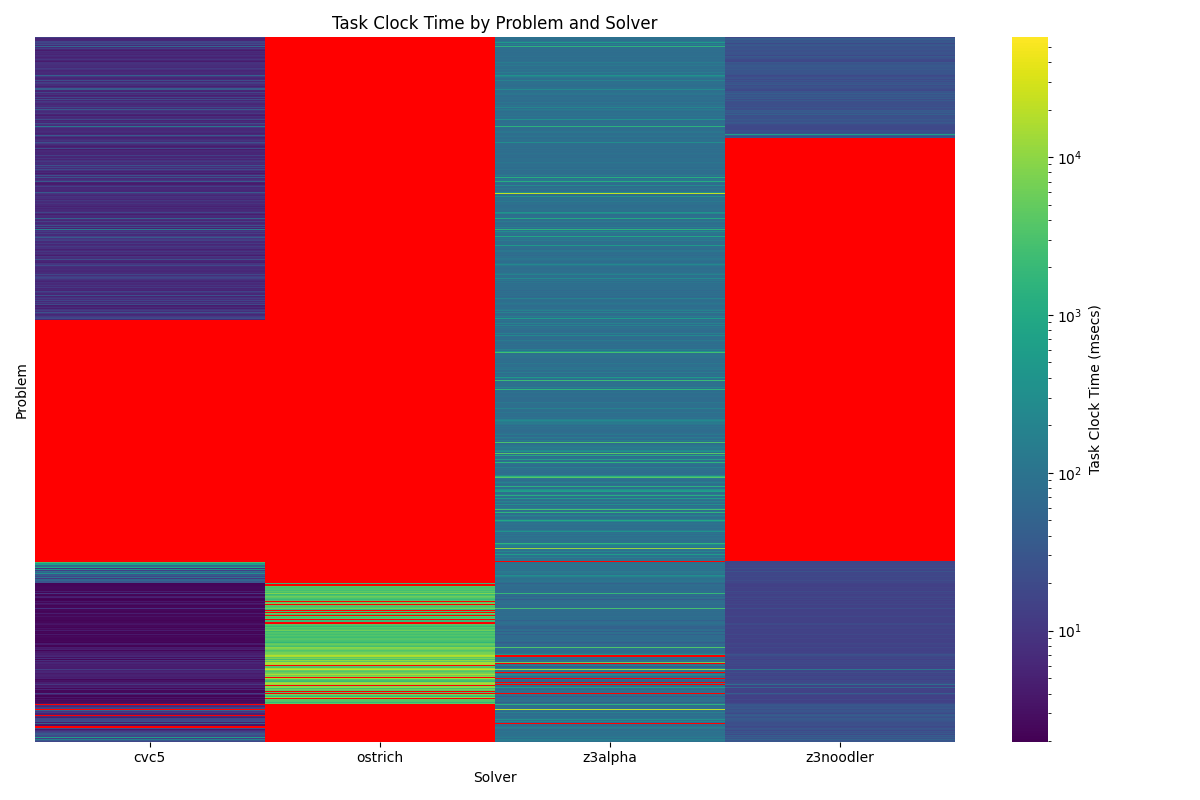

In [8]:
%matplotlib widget
cmap = sns.color_palette("viridis", as_cmap=True)
cmap = cmap.copy()
cmap.set_bad(color="red")

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'Task Clock Time (msecs)'},
    cmap = cmap,
    norm = LogNorm()
)

# Title and labels
plt.title('Task Clock Time by Problem and Solver')
plt.xlabel('Solver')
plt.ylabel('Problem')

plt.yticks([])

# Adjust layout to fit the plot
plt.tight_layout()
